# Laboratorio 9

## Tabelle Hash e programmazione dinamica

### Tabelle Hash

Le tabelle hash sono un metodo alternativo, rispetto agli alberi bilanciati, per implementare insiemi e dizionari.
L'idea di questa struttura dati è quella di poter ricavare direttamente dal valore della chiave la posizione che la chiave occupa nella tabella.
In questo modo, per ciascuna operazione di inserimento, cancellazione o ricerca, è sufficiente una singola operazione di calcolo della posizione della chiave nella tabella, richiedendo un tempo di esecuzione costante $O(1)$.

Per realizzare efficientemente un dizionario tramite una tabella hash, occorre:

1. una funzione hash $h$ che mappa le chiavi in un intervallo di indici della tabella, che sia calcolabile velocemente e possibilmente distribuisca le chiavi in modo uniforme;
2. un metodo di scansione della tabella che permetta di trovare rapidamente una chiave, se presente;
3. che la dimensione $m$ della tabella sia possibilmente una sovrastima del numero $n$ di chiavi che si prevede di memorizzare nella tabella.

* Per la funzione hash, si possono utilizzare diverse funzioni, l'importante è che siano calcolabili in tempo costante e che tutti gli indici della tabella siano raggiungibili.
Una funzione hash molto semplice è quella che calcola il resto della divisione intera della chiave per la dimensione della tabella: $h(k) = k \mod m$.

* I metodi di scansione si dividono in _esterni_ e _interni_, a seconda che le chiavi siano memorizzate nella tabella o meno. 
    - Il metodo di scansione esterno più utilizzato è il chaining (o concatenamento), che consiste nel memorizzare in ciascuna posizione della tabella una lista di chiavi che hanno la stessa posizione nella tabella. 
    - Quelli interni più utilizzati sono il linear probing, il quadratic probing e il double hashing. 

**Metodi di scansione interni**


- Il **linear probing** consiste nel memorizzare la chiave nella prima posizione libera della tabella che si incontra a partire dalla posizione calcolata dalla funzione hash, $h(k, i) = (h'(k) + c\cdot i) \mod m$.
- Il **quadratic probing** consiste nel memorizzare la chiave nella prima posizione libera della tabella che si incontra a partire dalla posizione calcolata dalla funzione hash, incrementando la posizione di un valore che cresce quadraticamente ad ogni tentativo, $h(k, i) = (h'(k) + c \cdot i^2) \mod m$.
- Il **probing pseudocasuale** consiste nel memorizzare la chiave nella prima posizione libera della tabella che si incontra a partire dalla posizione calcolata dalla funzione hash e da un valore casuale, $h(k, i) = (h'(k) + r_i) \mod m$, dove $r_i$ è un valore dato da un generatore di numeri pseudocasuali.
- Il **double hashing** consiste nell'utilizzare una combinazione di due funzioni hash $h_1$ e $h_2$ per calcolare la posizione della chiave nella tabella: $h(k, i) = (h_1(k) + i \cdot h_2(k)) \mod m$.

**Complessità medie**

Il tempo medio di ricerca in una tabella hash dipende dal _fattore di carico_ $\alpha = n/m$, dove $n$ è il numero di chiavi memorizzate nella tabella e $m$ è la dimensione della tabella.

Definendo:
* $I(\alpha)$ il numero medio di accessi alla tabella per la ricerca di una chiave non presente (insuccesso);
* $S(\alpha)$ il numero medio di accessi alla tabella per la ricerca di una chiave presente (successo);

possiamo definire la seguente tabella di costi medi:


| Scansione                | $\alpha$    | $I(\alpha)$            | $S(\alpha)$         |
|--------------------------|-------------|------------------------|---------------------|
|     Hashing Doppio       | $\leq 1$    | $\cfrac{1}{1-\alpha}$  | $\cfrac{1}{\alpha} \cdot \ln \Big(\cfrac{1}{1-\alpha}\Big)$ |
|     Concatenamento       | $\geq 0$    | $1 + \alpha$           | $ 1 + \cfrac{\alpha}{2}$                                    |


* Se in una tabella hash con indirizzamento aperto, riscontrate un numero di accessi per la ricerca di una chiave pari a 2 accessi in caso di successo e 4 accessi in caso di insuccesso, qual è il fattore di carico $\alpha$?

* Se utilizziamo una tabella hash con concatenamento, ma alcune chiavi sono ricercate più frequentemente di altre, quale accorgimento possiamo adottare per migliorare le prestazioni?

## Programmazione dinamica

La programmazione dinamica è una tecnica di progettazione di algoritmi basata sul metodo divide et impera, che permette di risolvere un problema suddividendolo in sottoproblemi, risolvendo ciascun sottoproblema una sola volta e memorizzando la soluzione in modo che possa essere utilizzata per risolvere altri sottoproblemi.

La programmazione dinamica è applicabile a quei problemi per i quali la soluzione ottima può essere ottenuta combinando le soluzioni ottime di sottoproblemi, che possono essere risolti in modo indipendente.


### Problema dello zaino

Il problema dello zaino (o _knapsack problem_) consiste nel riempire uno zaino con oggetti di diverso peso e valore, in modo da massimizzare il valore degli oggetti contenuti nello zaino, senza superare il peso massimo che lo zaino può contenere.

Il problema dello zaino è un problema di ottimizzazione combinatoria, che può essere risolto tramite programmazione dinamica.

Il problema è definito da:

- $C \in \mathbb{N}$, la capacità dello zaino;
- $n \in \mathbb{N}$, il numero di oggetti;
- $w_i \in \mathbb{N}$, il peso dell'oggetto $i$-esimo;
- $p_i \in \mathbb{N}$, il valore dell'oggetto $i$-esimo.

Viene definito poi un vettore $s \in \mathbb{N}^n$, tale che $s_i = 1$ se l'oggetto $i$-esimo è contenuto nello zaino, $s_i = 0$ altrimenti.
Sia dunque $S$ l'insieme degli oggetti scelti, ovvero $S = \{i \in \{1, \dots, n\} \mid s_i = 1\}$.
Tale insieme dovrà soddisfare il seguente vincolo: $\sum_{i\in S} w_i \leq C$.

E l'obiettivo è quello di massimizzare il valore degli oggetti contenuti nello zaino: $\sum_{i\in S} p_i$.


**Definizione della soluzione**

Sia $P[i, c]$ il valore massimo che può essere ottenuto riempiendo uno zaino di capacità $c$ con gli oggetti $1, \dots, i$.
Allora il massimo profitto per il problema iniziale è dato da $P[n, C]$.

Come riempiamo questa tabella?

Supponiamo di avere già calcolato una soluzione ottima per il problema $P[i-1, c]$:

- se prendiamo l'oggetto $i$-esimo, avremo $P[i, c] = p_i + P[i-1, c-w_i]$;
- se non prendiamo l'oggetto $i$-esimo, avremo $P[i, c] = P[i-1, c]$.

Quindi, la soluzione ottima per il problema $P[i, c]$ è data da:  $\max\{p_i + P[i-1, c-w_i], P[i-1, c]\}$.

Ci mancano altre due cose per definire $P[i, c]$, ovvero i casi base:

- qual è il massimo profitto che possiamo ottenere riempiendo uno zaino di capacità $0$?
- qual è il profitto massimo se non abbiamo oggetti da inserire nello zaino?


$$
P[i,c] = \begin{cases}
0 & \text{se } i = 0  \text{ oppure } c = 0 \\
-\infty & \text{se } c < 0 \\
\max\{p_i + P[i-1, c-w_i], P[i-1, c]\} & \text{altrimenti}
\end{cases}$$



A questo punto possiamo definire una funzione iterativa che calcola il massimo profitto che può essere ottenuto riempiendo uno zaino di capacità $C$ con gli oggetti $1, \dots, n$.


<Axes: >

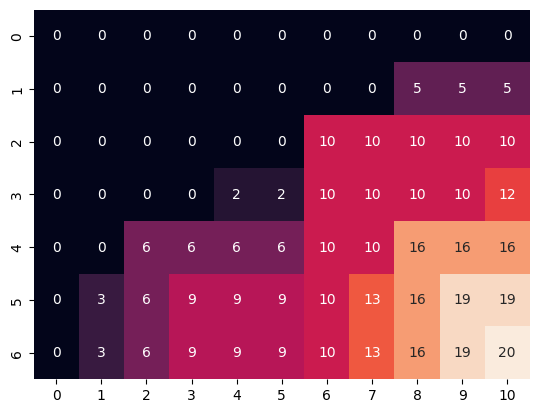

In [16]:
import numpy as np
import seaborn as sns
import pandas as pd

def knapsack(weights: list[int], values: list[int], capacity: int) -> list[int]:
    """
    Data una lista di pesi, una lista di valori e una capacità massima, restituisce
    la tabella dei valori massimi che si possono ottenere con i primi i pesi e i primi j valori.
    """
    P = np.zeros((len(weights) + 1, capacity + 1))

    for i in range(1, len(weights) + 1):
        for j in range(1, capacity + 1):
            # Se non eccediamo la capacità dello zaino, 
            # applichiamo la soluzione ottima per il sottoproblema i-esimo
            if weights[i - 1] <= j:
                P[i, j] = max(P[i - 1, j], values[i - 1] + P[i - 1, j - weights[i - 1]])
            else:
                P[i, j] = P[i - 1, j]

    return P

weights = [8, 6, 4, 2, 1, 10]
values = [5, 10, 2, 6, 3, 20]
capacity = 10

P = knapsack(weights, values, capacity)

df = pd.DataFrame(P)
df.columns = [i for i in range(capacity + 1)]
df.index = [i for i in range(len(weights) + 1)]
sns.heatmap(df, annot=True, cbar = False)


## Problema basato su knapsack


State organizzando una festa e volete invitare alcuni vostri amici. Ognuno di questi $n$ amici porterà con sé un regalo di valore $v_i$. Tuttavia, ogni amico con indice $i$ non può sopportare la presenza dei suoi "vicini" $i-1$ e $i+1$ (se esistono).

Dovete rispettare questo vincolo, ma allo stesso tempo volete massimizzare il valore totale dei regali portati dai vostri amici.

* Come risolvereste questo problema?
* Il problema ha una sottostruttura ottima che può essere utilizzata per risolverlo tramite programmazione dinamica?

**Soluzione**

Sia $P[i]$ il valore massimo che può essere ottenuto invitando gli amici $1, \dots, i$.
Allora il massimo profitto per il problema iniziale è dato da $P[n]$.

Come riempiamo questa tabella?

Supponiamo di avere già calcolato una soluzione ottima per il problema $P[i-1]$:

- se invitiamo l'amico $i$-esimo, avremo $P[i] = v_i + P[i-2]$;
- se non invitiamo l'amico $i$-esimo, avremo $P[i] = P[i-1]$.

Quindi, la soluzione ottima per il problema $P[i]$ è data da:  $\max\{v_i + P[i-2], P[i-1]\}$.

Ci mancano altre due cose per definire $P[i]$, ovvero i casi base:

- qual è il massimo profitto che possiamo ottenere invitando $0$ amici? ovviamente $0$;
- qual è il profitto massimo se non abbiamo amici da invitare? ovviamente $0$.


In [31]:
def party_planner(people: list[int], presents: int) -> list[int]:
    """
    Data una lista di persone e di valori dei regali, 
    restituire gli indici delle persone da invitare e 
    il valore totale dei regali.
    """
    P = np.zeros(len(people) + 1)
    inviti = [[] for i in range(len(people) + 1)]

    for i in range(1, len(people) + 1):
        P[i] = max(P[i - 1], presents[i - 1] + P[i - 2])
        if P[i] == P[i - 1]:
            inviti[i] = inviti[i - 1]
        else:
            inviti[i] = inviti[i - 2] + [i]
    dict = {'P': P, 'inviti': inviti}
    return dict

people = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
presents = [12, 31, 23, 7, 5, 6, 13, 8, 9, 10]

results = party_planner(people, presents)
df = pd.DataFrame(results)
df

,P,inviti
0,0.0,[]
1,12.0,[1]
2,31.0,[2]
3,35.0,"[1, 3]"
4,38.0,"[2, 4]"
5,40.0,"[1, 3, 5]"
6,44.0,"[2, 4, 6]"
7,53.0,"[1, 3, 5, 7]"
8,53.0,"[1, 3, 5, 7]"
9,62.0,"[1, 3, 5, 7, 9]"


### Nota: alcuni link che potrebbero aiutarvi a capire meglio la programmazione dinamica
* [Una bella spiegazione su StackOverflow con annesse risorse](https://stackoverflow.com/questions/4278188/good-examples-articles-books-for-understanding-dynamic-programming)
* [GeeksforGeeks DP page](https://www.geeksforgeeks.org/dynamic-programming/)
* [MIT course on DP](https://www.youtube.com/watch?v=r4-cftqTcdI)

*E per riderci su:*
https://www.reddit.com/r/leetcode/comments/y568jr/dynamic_programming_is_the_fucking_worst/